In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [5]:
df = pd.read_csv('311-cases.csv')

C:\Users\donah\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.head()

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Police District,Latitude,Longitude,Point,Source,Media URL
0,342656,2009-01-01T16:30:51,2009-01-01T18:07:06,2009-01-01T18:07:06,Closed,NaN,DPW Ops Queue,Graffiti,Graffiti on Building_residential,Building_residential - Not_Offensive,"517 FILLMORE ST, SAN FRANCISCO, CA, 94117",5.0,Lower Haight,NORTHERN,37.77418,-122.4310,"{'longitude': '-122.431047126588', 'needs_reco...",Phone,NaN
1,342643,2009-01-01T15:45:36,2009-01-01T17:07:06,2009-01-01T17:07:06,Closed,NaN,DPW Ops Queue,Graffiti,Graffiti on Building_residential,Building_residential - Post_Abatement_Inspection,"301 MASONIC AVE, SAN FRANCISCO, CA, 94118",1.0,Lone Mountain,PARK,37.77842,-122.4472,"{'longitude': '-122.447227478027', 'needs_reco...",Phone,NaN
2,342579,2009-01-01T12:10:13,2009-01-01T13:07:06,2009-01-01T13:07:06,Closed,NaN,DPW Ops Queue,Street and Sidewalk Cleaning,General Cleaning,Other Loose Garbage,Intersection of 8TH ST and MARKET ST,6.0,Civic Center,TENDERLOIN,37.77872,-122.4147,"{'longitude': '-122.414741067879', 'needs_reco...",Phone,NaN
3,342568,2009-01-01T11:38:09,2009-01-01T12:07:06,2009-01-01T12:07:06,Closed,NaN,DPW Ops Queue,Street and Sidewalk Cleaning,Bulky Items,Furniture,"2469 SAN BRUNO AVE, SAN FRANCISCO, CA, 94134",9.0,Portola,BAYVIEW,37.72310,-122.4017,"{'longitude': '-122.401668846634', 'needs_reco...",Phone,NaN
4,342546,2009-01-01T10:50:07,2009-01-01T12:07:07,2009-01-01T12:07:07,Closed,NaN,DPW Ops Queue,Street and Sidewalk Cleaning,Bulky Items,Furniture,Intersection of 18TH ST and MISSION ST,9.0,Mission,MISSION,37.76184,-122.4194,"{'longitude': '-122.419359315196', 'needs_reco...",Phone,NaN


In [12]:
df_dumping = df[df['Category']=='Street and Sidewalk Cleaning']

In [51]:
df_dumping.head()

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Police District,Latitude,Longitude,Point,Source,Media URL
2,342579,2009-01-01T12:10:13,2009-01-01T13:07:06,2009-01-01T13:07:06,Closed,NaN,DPW Ops Queue,Street and Sidewalk Cleaning,General Cleaning,Other Loose Garbage,Intersection of 8TH ST and MARKET ST,6.0,Civic Center,TENDERLOIN,37.77872,-122.4147,"{'longitude': '-122.414741067879', 'needs_reco...",Phone,NaN
3,342568,2009-01-01T11:38:09,2009-01-01T12:07:06,2009-01-01T12:07:06,Closed,NaN,DPW Ops Queue,Street and Sidewalk Cleaning,Bulky Items,Furniture,"2469 SAN BRUNO AVE, SAN FRANCISCO, CA, 94134",9.0,Portola,BAYVIEW,37.72310,-122.4017,"{'longitude': '-122.401668846634', 'needs_reco...",Phone,NaN
4,342546,2009-01-01T10:50:07,2009-01-01T12:07:07,2009-01-01T12:07:07,Closed,NaN,DPW Ops Queue,Street and Sidewalk Cleaning,Bulky Items,Furniture,Intersection of 18TH ST and MISSION ST,9.0,Mission,MISSION,37.76184,-122.4194,"{'longitude': '-122.419359315196', 'needs_reco...",Phone,NaN
5,342514,2009-01-01T09:13:06,2009-01-01T11:07:06,2009-01-01T11:07:06,Closed,NaN,DPW Ops Queue,Street and Sidewalk Cleaning,General Cleaning,Other Loose Garbage,Intersection of DWIGHT ST and GOETTINGEN ST,9.0,Portola,BAYVIEW,37.72329,-122.4051,"{'longitude': '-122.405086927628', 'needs_reco...",Phone,NaN
13,342450,2008-12-31T21:29:47,2009-01-01T06:07:21,2009-01-01T06:07:21,Closed,NaN,DPW Ops Queue,Street and Sidewalk Cleaning,Bulky Items,Refrigerator,Intersection of CORBETT AVE and CUESTA CT,8.0,Upper Market,PARK,37.75046,-122.4440,"{'longitude': '-122.443968604795', 'needs_reco...",Phone,NaN


In [58]:
df_dumping.loc[:,['Opened','Closed']] = df_dumping.loc[:,['Opened','Closed']].apply(pd.to_datetime)

C:\Users\donah\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [77]:
df_dumping.iloc[0,2]-df_dumping.iloc[0,1]

Timedelta('0 days 00:56:53')

In [96]:
df_dumping['resolution time'] = (df_dumping['Closed']-df_dumping['Opened']).astype('timedelta64[m]')

C:\Users\donah\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


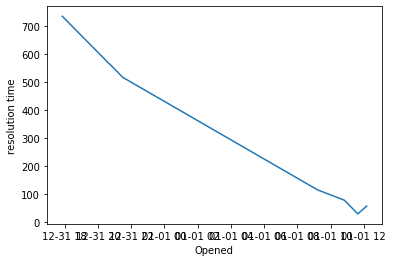

In [97]:
sns.lineplot(df_dumping['Opened'][0:10],df_dumping['resolution time'][0:10])

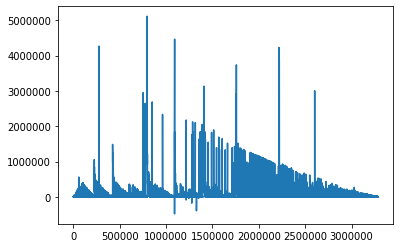

In [98]:
plt.plot(df_dumping['resolution time'])

In [99]:
df_dumping.describe()

,CaseID,Supervisor District,Latitude,Longitude,resolution time
count,9.278480e+05,919319.000000,927848.000000,927848.00000,9.150720e+05
mean,5.218792e+06,6.475063,37.438791,-121.37559,6.227665e+03
std,3.035906e+06,3.016311,3.484336,11.29582,5.748360e+04
min,2.402150e+05,-1.000000,0.000000,-141.21880,-4.807240e+05
25%,2.537942e+06,4.000000,37.743430,-122.43650,1.220000e+02
50%,5.616280e+06,6.000000,37.766600,-122.41960,5.930000e+02
75%,8.019388e+06,9.000000,37.781970,-122.40870,2.492000e+03
max,9.824904e+06,11.000000,37.881600,0.00000,5.112425e+06


In [104]:
pd.unique(df_dumping['Supervisor District'])

array([ 6.,  9.,  8., 11.,  2.,  3., nan,  5.,  7., 10.,  1.,  4., -1.,
        0.])

In [107]:
df_dumping[df_dumping['Supervisor District']==1].head()

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Police District,Latitude,Longitude,Point,Source,Media URL,resolution time
29,342328,2008-12-31 16:05:38,2009-01-01 06:07:32,2009-01-01T06:07:32,Closed,NaN,DPW Ops Queue,Street and Sidewalk Cleaning,Bulky Items,Furniture,"453 31ST AVE, SAN FRANCISCO, CA, 94121",1.0,Outer Richmond,RICHMOND,37.78060,-122.4910,"{'longitude': '-122.491', 'needs_recoding': Fa...",Phone,NaN,841.0
39,342247,2008-12-31 14:21:07,2009-01-01 06:07:17,2009-01-01T06:07:17,Closed,NaN,DPW Ops Queue,Street and Sidewalk Cleaning,General Cleaning,Other Loose Garbage,Intersection of 30TH AVE and CALIFORNIA ST,1.0,NaN,RICHMOND,37.78364,-122.4904,"{'longitude': '-122.490364374905', 'needs_reco...",Phone,NaN,946.0
40,342245,2008-12-31 14:19:29,2009-01-01 06:07:17,2009-01-01T06:07:17,Closed,NaN,DPW Ops Queue,Street and Sidewalk Cleaning,General Cleaning,Other Loose Garbage,Intersection of 30TH AVE and CLEMENT ST,1.0,Outer Richmond,RICHMOND,37.78178,-122.4902,"{'longitude': '-122.490230991407', 'needs_reco...",Phone,NaN,947.0
49,342173,2008-12-31 13:03:33,2009-01-01 06:07:20,2009-01-01T06:07:20,Closed,NaN,DPW Ops Queue,Street and Sidewalk Cleaning,General Cleaning,Other Loose Garbage,Intersection of 27TH AVE and GEARY BLVD,1.0,Outer Richmond,RICHMOND,37.77999,-122.4869,"{'longitude': '-122.48687801563', 'needs_recod...",Phone,NaN,1023.0
50,342168,2008-12-31 13:00:46,2008-12-31 14:07:06,2008-12-31T14:07:06,Closed,NaN,DPW Ops Queue,Street and Sidewalk Cleaning,General Cleaning,Other Loose Garbage,"463 27TH AVE, SAN FRANCISCO, CA, 94121",1.0,Outer Richmond,RICHMOND,37.78075,-122.4871,"{'longitude': '-122.487074503212', 'needs_reco...",Phone,NaN,66.0


In [135]:
n_times = df_dumping.groupby(by='Neighborhood')[['Neighborhood','resolution time']].mean().sort_values(by='resolution time',ascending=False)

In [138]:
n_times.head(20)

,resolution time
Neighborhood,
Lincoln Park / Ft. Miley,57278.282486
Monterey Heights,33744.900000
McLaren Park,25137.479094
Forest Knolls,23838.441815
Presidio National Park,23540.262136
Sherwood Forest,23365.198238
Forest Hill,20727.043810
India Basin,18231.798186
Diamond Heights,17736.839112


<BarContainer object of 118 artists>

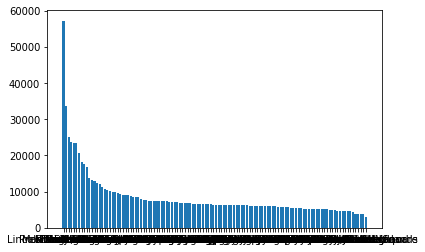

In [137]:
plt.bar(n_times.index,n_times['resolution time'])

# Look at portola neighborhood over time

In [158]:
bayview = df_dumping[df_dumping['Neighborhood']=="Bayview"]

In [159]:
pd.unique(df_dumping['Neighborhood'])

array(['Civic Center', 'Portola', 'Mission', 'Upper Market',
       'Crocker Amazon', 'Union Street', 'Lower Nob Hill', 'Oceanview',
       nan, 'South of Market', 'Ashbury Heights', 'Lakeshore',
       'Outer Richmond', 'Outer Sunset', 'Inner Sunset', 'Excelsior',
       'Merced Heights', 'Pacific Heights', 'Bernal Heights',
       'Downtown / Union Square', 'Castro', 'Lone Mountain', 'Noe Valley',
       'Nob Hill', 'Hayes Valley', ' ', 'Financial District',
       'Inner Richmond', 'North Beach', 'Parkside', 'Bayview',
       'Visitacion Valley', 'Hunters Point', 'Cole Valley',
       'Russian Hill', 'Lower Pacific Heights', 'Tenderloin',
       'Miraloma Park', 'Eureka Valley', 'Silver Terrace',
       'Golden Gate Heights', 'Ingleside', 'Mint Hill', 'Lower Haight',
       'Cathedral Hill', 'Marina', 'Duboce Triangle', 'Mission Dolores',
       'Peralta Heights', 'Dolores Heights', 'Golden Gate Park',
       'Fairmount', 'Holly Park', 'Corona Heights', 'Mission Terrace',
       'Ch

In [177]:
bayview['Day of Week'] = bayview['Opened'].dt.dayofweek

C:\Users\donah\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [178]:
bayview.head()

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,...,Supervisor District,Neighborhood,Police District,Latitude,Longitude,Point,Source,Media URL,resolution time,Day of Week
111,341666,2008-12-30 16:47:05,2008-12-31 06:07:22,2008-12-31T06:07:22,Closed,NaN,DPW Ops Queue,Street and Sidewalk Cleaning,General Cleaning,Other Loose Garbage,...,10.0,Bayview,BAYVIEW,37.73836,-122.3870,"{'longitude': '-122.386961621869', 'needs_reco...",Phone,NaN,800.0,1
112,341665,2008-12-30 16:46:27,2008-12-31 06:07:13,2008-12-31T06:07:13,Closed,NaN,DPW Ops Queue,Street and Sidewalk Cleaning,Hazardous Materials,Glass,...,10.0,Bayview,BAYVIEW,37.73836,-122.3870,"{'longitude': '-122.386961621869', 'needs_reco...",Phone,NaN,800.0,1
262,341175,2008-12-30 09:38:20,2008-12-31 06:07:16,2008-12-31T06:07:16,Closed,NaN,DPW Ops Queue,Street and Sidewalk Cleaning,Bulky Items,Mattress,...,10.0,Bayview,BAYVIEW,37.73760,-122.3890,"{'longitude': '-122.389', 'needs_recoding': Fa...",Phone,NaN,1228.0,1
425,340608,2008-12-29 13:36:48,2008-12-30 06:07:12,2008-12-30T06:07:12,Closed,NaN,DPW Ops Queue,Street and Sidewalk Cleaning,Automotive,Tires,...,10.0,Bayview,BAYVIEW,37.73898,-122.3864,"{'longitude': '-122.386398781522', 'needs_reco...",Phone,NaN,990.0,0
534,340344,2008-12-29 10:11:07,2008-12-30 08:07:07,2008-12-30T08:07:07,Closed,NaN,DPW Ops Queue,Street and Sidewalk Cleaning,General Cleaning,Other Loose Garbage,...,10.0,Bayview,BAYVIEW,37.73401,-122.3910,"{'longitude': '-122.390967896598', 'needs_reco...",Phone,NaN,1316.0,0


In [179]:
bayview_respTime = bayview.groupby(by='Day of Week')['resolution time'].mean()

In [180]:
bayview_respTime

Day of Week
0     4398.065860
1     5536.278922
2     6114.576540
3     5925.055684
4    10863.883173
5     7812.453292
6     4694.875850
Name: resolution time, dtype: float64

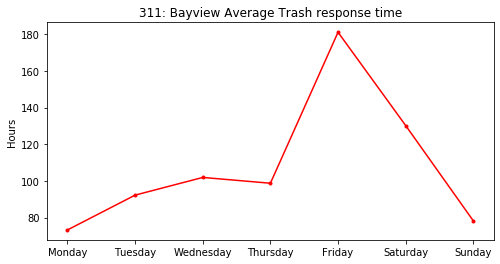

In [198]:
key = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
key.values()
plt.figure(figsize=(8,4))
plt.plot(bayview_respTime/60,'r.-')
plt.xticks(range(0,7),key.values())
plt.ylabel('Hours')
plt.title('311: Bayview Average Trash response time')
plt.show()


In [215]:
df_dumping['Day of Week'] = df_dumping['Opened'].dt.dayofweek

C:\Users\donah\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [237]:
test = pd.pivot_table(df_dumping,values='resolution time',index=['Day of Week'],columns=['Neighborhood'],aggfunc=np.nanmean)

In [238]:
test

Neighborhood,,Alamo Square,Anza Vista,Apparel City,Aquatic Park / Ft. Mason,Ashbury Heights,Balboa Terrace,Bayview,Bernal Heights,Bret Harte,...,Treasure Island,Union Street,University Mound,Upper Market,Visitacion Valley,West Portal,Western Addition,Westwood Highlands,Westwood Park,Yerba Buena Island
Day of Week,,,,,,,,,,,,,,,,,,,,,
0,6330.826590,6098.133455,16651.436275,5675.748538,2898.257143,3780.337662,5590.250000,4398.065860,5180.129175,4797.639746,...,2913.769231,2754.885512,6314.546911,6820.402570,4173.289324,3111.361111,4856.747493,1223.166667,5305.629630,2399.000000
1,6744.852564,6313.808099,4441.341346,4662.995501,4419.034247,7702.281853,1792.192308,5536.278922,5393.000673,4609.253086,...,20125.000000,4274.238541,4936.868468,3748.882507,3971.922997,2298.313305,6203.297597,2710.909091,5248.796610,2359.666667
2,6430.521173,5013.962227,4476.403409,5488.290283,3078.295597,6812.911197,10076.653846,6114.576540,7090.862275,5165.690732,...,2742.250000,6621.597403,9119.509537,4307.023256,5231.768478,7302.660944,4216.280772,1945.750000,4149.733333,4934.666667
3,8359.172691,5465.409766,8941.483696,6075.736937,9988.444444,4317.564000,13559.307692,5925.055684,10563.152082,3200.279584,...,1249.888889,3862.959607,5730.190476,3307.978723,6914.073740,2962.532020,8162.607942,3470.444444,9743.327731,NaN
4,6879.068085,5959.835586,2942.327381,12598.466667,7129.031496,2269.110599,2918.461538,10863.883173,5637.639832,9240.521168,...,27751.785714,5848.497519,2653.141509,12651.989967,5696.819629,12162.689119,7795.885039,4380.333333,7947.855556,NaN
5,8461.722628,8637.856423,3085.652542,2689.859459,4286.824176,5802.173469,9395.266667,7812.453292,9526.002621,11507.208602,...,5556.875000,2835.728045,2876.925926,3639.502165,5906.591935,11550.674074,5994.844891,9323.500000,2761.711538,5098.500000
6,8463.166667,4261.977505,25592.520000,8298.486989,1766.628866,16378.552632,1760.518519,4694.875850,5631.007493,3476.937238,...,5843.583333,6178.222370,2673.322072,7603.433735,6192.949212,4612.659091,3947.679928,3475.900000,45705.892857,NaN


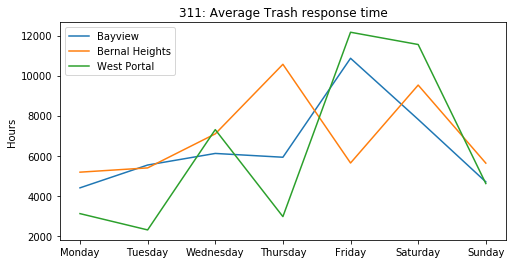

In [245]:
plt.figure(figsize=(8,4))
plt.plot(test.loc[:,['Bayview','Bernal Heights','West Portal']])
plt.xticks(range(0,7),key.values())
plt.ylabel('Hours')
plt.title('311: Average Trash response time')
plt.legend(['Bayview','Bernal Heights','West Portal'])
plt.show()
